# Práctica 3: Sistema de Planificación de Ruta

## Imports y archivos de ejemplo

In [1]:
#Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
from PIL import Image, ImageDraw
from random import randrange 
import matplotlib.cm as cm
from heapq import *

# Every file used to test the algorithm
maze_file = "imgs/maze.png"
maze2_file = "imgs/maze2.png"
lab_file = "imgs/labirinto.png"
prado_file = "imgs/prado.png"
zelda_file = "imgs/zelda.png"

# Image with the start and end points
ppath_file = "imgs/path_points.png"

# Image with the final path
fpath_file = "imgs/final_path.png"    

## Selección de variables

Puede cambiar los valores de los elementos principales del código desde aquí.

Existen una serie de imágenes predeterminadas con sus correspondientes valores de reducción.

Si se desean añadir nuevos archivos, basta con cambiar la variable "file_path" por la ruta del archivo deseado.

* A tener en cuenta: las imágenes deben ser minimizadas para poder ser tratadas con rapidez. Se recomiendan tamaños del orden de 10 a 15.

In [2]:
# Read the image and get the binary matrix
"""
    maze_file ==> Maze from the example assets of Moodle. Ideal size: 
    resize_w = 7
    resize_h = 7
    
    maze2_file ==> Maze from https://www.dreamstime.com/vector-illustration-maze-gray-background-layers-grouped-easy-editing-illustration-your-design-vector-illustration-image111835219
    Ideal size:
    resize_w = 60
    resize_h = 60
    
    lab_file ==> Maze from the example assets of Moodle. Ideal size:     
    resize_w = 15
    resize_h = 15
    
    prado_file ==> Floor plan of the Prado Museum from the example assets of Moodle. Ideal size:
    resize_w = 9
    resize_h = 9
    
    zelda_file ==> Screenshot from The Legend of Zelda (1986) for NES (Nintendo(R)). Ideal size:     
    resize_w = 15
    resize_h = 15
    
"""

# Selected image
file_path = maze_file

# Times that the image will be shrinked
resize_w = 4
resize_h = 4

## Funciones auxiliares

In [3]:
# Print the space as a binary matrix
def print_space(space, h, w):
    for r in range(h):
      for c in range(w):
        print(space[r,c],end='')
      print()

In [4]:
# Function used to show the image
def img_show(img_file):
  # Read and show the image used as a map
  img = cv2.imread(img_file)
  plt.figure(figsize=(7,7))
  # Show the image
  plt.imshow(img)
  plt.show()

In [5]:
#From https://stackoverflow.com/questions/57610416/how-to-read-a-maze-from-an-image-and-convert-it-to-binary-values-in-python

# Function used to read the image and convert it to binary
def read_img(img_file, re_w, re_h): 

  img_show(img_file)

  # Open the image, make greyscale, and get its dimensions
  im = Image.open(img_file).convert('L')
  w, h = im.size

  # Ensure all black pixels are 0 and all white pixels are 1
  binary = im.point(lambda p: p > 128 and 1)

  # Resize its height and width to make an easier search
  binary = binary.resize((w//re_w,h//re_h),Image.NEAREST)
  w, h = binary.size

  # Convert to Numpy array
  space = np.array(binary)
  print("Base \n")
  
  #print_space(space, h, w)

  return space, w, h

In [6]:
# The heuristic estimates the minimun path to reach goal from a node as a cost. Euclidean distance
def heuristic (current_point, end):
    return math.sqrt((end[0] - current_point[0])**2 + (end[1] - current_point[1])**2)

# Evaluation function used to sort the list. best = path_cost + heuristic
def best (state):
    return state[2] + state[3] 

## Algoritmo principal: A*

In [7]:
def astar(space, start, end, w, h):

    # List of states: each state is (coordinates, previous, path_cost, heuristic_cost)
    states = [((start[0], start[1]), list(), 0, heuristic(start, end))]
    
    # Dictionary of visited points
    visited = {} 
    
    while True:

        # Get first state (least cost)
        state = states.pop(0)

        # Check if the end has been reached
        (i, j) = state[0]
        if space[i][j] == 3:
            path = [state[0]] + state[1]
            path.reverse()
            return path, next_cost

        # Set the cost (path travelled so far)
        visited[(i, j)] = state[2] 
        
        # Explore neighbours of the current position
        neighbour = []
        if i > 0 and space[i-1][j] > 0:
            neighbour.append((i-1, j))
        if i < h and space[i+1][j] > 0:
            neighbour.append((i+1, j))
        if j > 0 and space[i][j-1] > 0:
            neighbour.append((i, j-1))
        if j < w and space[i][j+1] > 0:
            neighbour.append((i, j+1))
        
        # Discard bad neighbours
        for n in neighbour:
            next_cost = state[2] + 1
            # Ignore those neighbours already visited
            if n in visited and visited[n] >= next_cost:
                continue
            states.append((n, [state[0]] + state[1], next_cost, heuristic(n, end)))

        # Resort the list
        states.sort(key=best)

## Ejecución

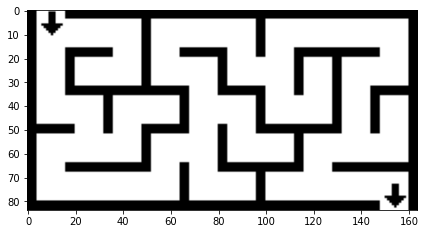

Base 


 Maze with random start and goal 

Start:  (11, 19)
End:  (14, 30) 



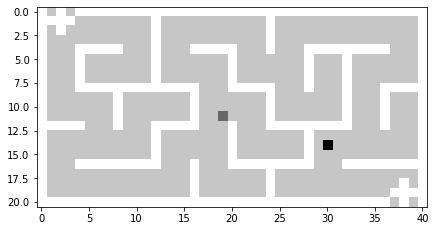

In [ ]:
def main():

    space, w, h = read_img(file_path, resize_w, resize_h)
    
    # Define randomly the start and end points
    start = (randrange(h-1), randrange(w-1))
    end = (randrange(h-1), randrange(w-1))
    
    # Both start and end must not be a 0 (wall) nor be at the edges of the image    
    while start == end or space[start] == 0 or space[end] == 0 or start[0] == h or start[1] == w or end[0] == h or end[1] == w:
      start = (randrange(h-1), randrange(w-1))
      end = (randrange(h-1), randrange(w-1))

    # Start point will be define internally as a 2
    space[start] = 2
    # End point will be define internally as a 3
    space[end] = 3
    
    print("\n Maze with random start and goal \n")
    print("Start: ", start)
    print("End: ", end, "\n")
    
    plt.imsave(ppath_file, np.array(space), cmap=cm.Greys)
    img_show(ppath_file)
    
    # Call the algorithm
    path, cost = astar(space, start, end, w, h)
    
    # Each point of the path will be internally a 4
    mod_space = space
    for i in path:
      mod_space[i] = 4

    print("\n Final path \n") 
    
    print("Path taken: ", path)
    print("Final cost: ", cost, "\n")
    
    # Save the final image to show it    
    plt.imsave(fpath_file, np.array(mod_space), cmap=cm.Greys)
    
    img_show(fpath_file)

if __name__ == '__main__':
    main()